In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from scipy.optimize import curve_fit

In [62]:
gradini = np.array([525,575,525,262.5,512.5,575,500,687.5,487.5,562.5,475,312.5,462.5,562.5,475])*1e-3

In [63]:
gradini.mean()

0.49999999999999994

In [64]:
np.sqrt(gradini.std(ddof=1)**2 + (0.0125**2)/12)

0.1035727114042065

In [65]:
V_X = np.array([-0.56, -1.02, -1.53, -2.05, -2.24, -2.69, -3.28, -3.84, -4.6, -4.98, -5.5, -6.21, -6.5,  -6.98, -7.54, -8.03])
sigmaV = lambda a: 0.04*a+.05
sigma_V_X = sigmaV(V_X)

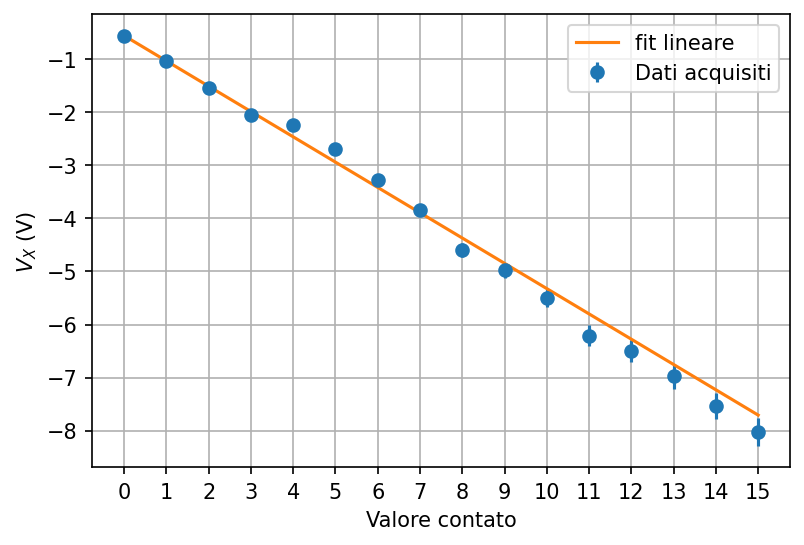

In [66]:
plt.errorbar(range(16), V_X, yerr=sigma_V_X, linestyle="", marker="o", label="Dati acquisiti")
plt.plot(range(16), retta(range(16), popt[0], popt[1]), label="fit lineare")
plt.xticks(range(16))
plt.grid()
plt.xlabel("Valore contato")
plt.ylabel("$V_X$ (V)")
plt.legend()